In [23]:
import pandas as pd
import numpy as np
from lxml import etree 
import urllib
import os
import requests
from bs4 import BeautifulSoup
import re
import seaborn as sns
from functools import reduce

In [30]:
tables = pd.read_html("https://ultimateframedata.com/stats.php")

stats1 = pd.DataFrame(tables[1]).rename(columns={'Character': 'Name'})
stats2 = pd.DataFrame(tables[2]).rename(columns={'Character': 'Name'})
stats3 = pd.DataFrame(tables[3]).rename(columns={'Character': 'Name'})
stats4 = pd.DataFrame(tables[4]).rename(columns={'Character': 'Name'})
stats5 = pd.DataFrame(tables[5]).rename(columns={'Character': 'Name'})
stats6 = pd.DataFrame(tables[6]).rename(columns={'Character': 'Name'})
stats7 = pd.DataFrame(tables[7]).rename(columns={'Character': 'Name'})
stats8 = pd.DataFrame(tables[8]).rename(columns={'Character': 'Name'})
stats9 = pd.DataFrame(tables[9]).rename(columns={'Character': 'Name'})
stats10 = pd.DataFrame(tables[10]).rename(columns={'Character': 'Name'})
stats11 = pd.DataFrame(tables[11]).rename(columns={'Character': 'Name'})
stats12 = pd.DataFrame(tables[12]).rename(columns={'Character': 'Name'})

#stats = stats1.rename(columns={'Character': 'Name'})
#stats.head()
#all_characters = list(stats['Character'])

dfs = [stats1, stats2,stats3, stats4,stats5, stats6,stats7,stats8,stats9,stats10,stats11,stats12]

alldata = stats1.merge(stats2, on = 'Name', how = 'inner')
alldata = reduce(lambda  left,right: pd.merge(left,right,on=['Name'],
                                              how='inner'), dfs)

alldata

,Rank_x,Name,Air speed,Rank_y,Regular Fall,Fast Fall,% Increase,Gravity,Full Hop_x,Short Hop_x,...,2nd Fastest Move(s),#3,3rd Fastest Move(s),Grab,"Grab, Post-Shieldstun",Item Throw(Forward),Item Throw(Back),Jump+Z-Drop (Front),Jump+Z-Drop(Behind),Key
0,1,Yoshi,1.344000,70,1.290,2.064,60%,0.080,36.09,14.43,...,Uair,11,Usmash,14,18,8,7,4,5,NaN
1,2,Jigglypuff,1.332000,76,0.980,1.568,60%,0.053,19.79,11.26,...,Nair,10,Dair,6,10,12,12,4,5,NaN
2,3,Mewtwo,1.313000,42-45,1.550,2.480,60%,0.082,31.11,17.5,...,"Nair, Fair",13,Uair,7,11,9,11,4,5,NaN
3,6-7,Wolf,1.281000,10-15,1.800,2.880,60%,0.130,32.02,15.38,...,Usmash,15,Jab,6,10,8,11,4,5,NaN
4,6-7,Lucario,1.281000,25-26,1.680,2.688,60%,0.084,37.62,18.19,...,Fair,13,"Nair, Uair",7,11,8,11,4,5,NaN
5,8,Wario,1.271000,35,1.610,2.576,60%,0.107,30.5,14.7,...,Nair,8,Fair,8,12,10,14,4,5,NaN
6,9,Zero Suit Samus,1.260000,23-25,1.700,2.720,60%,0.120,44.5,21.35,...,"Fair, Uair",10,Usmash,15,19,7,9,4,5,NaN
7,10,Greninja,1.239000,9,1.850,2.960,60%,0.180,46,22.11,...,Uair,12,Usmash,10,14,10,14,4,5,NaN
8,11,Captain Falcon,1.218000,6,1.865,2.984,60%,0.120,37.31,17.98,...,Bair,14,"UpB, Jab",6,10,8,11,4,5,Blue bold: Left in helpless/freefall state
9,12-16,Inkling,1.208000,37-40,1.580,2.528,60%,0.087,33,17.54,...,Bair,12,UpB,8,12,8,11,4,5,NaN


In [31]:
perc_url = "https://ssbworld.com/characters/win-percentage/"
r2 = requests.get(perc_url)
soup2 = BeautifulSoup(r2.text, 'html.parser')

fields2 = list(soup2.findAll(['div','a href'] , attrs={'class': re.compile("player-meta")}))

tags = soup2.find_all('a')
urls = []
for tag in tags:
    urls.append(tag.get('href'))
    
urls = urls[28:92]

#r2.text
#fields2

In [5]:
# str1 = map(str,fields2)
# res = list(map(lambda i: i[ : -10], str1)) 

# name = []
# for i in res:
#     name.append(i.split('">'))

# all_names = []
# for i in name:
#     all_names.append(i[2])
    
# all_names = all_names[64:]
# all_names = [w.replace('&amp;', '&') for w in all_names]

# all_names

In [32]:
allurls = []
for i in range(0,len(urls)):
    allurls.append("https://ssbworld.com" + urls[i])

In [7]:
#soup = BeautifulSoup(r.text, 'html.parser')
#print(soup.prettify())

In [35]:
final_df = pd.DataFrame()
for i in allurls:
    
    char_url = i
    r = requests.get(char_url)
    soup = BeautifulSoup(r.text, 'html.parser')
    name_field= soup.find_all(["h1"],{"class":"bio"})
    fields = soup.find_all(["h2","div"],{"class":"player-stat"})
    
    name_list = []
    for f in name_field:
        name_list.append(f.text)

    rec_list = []
    for f in fields:
        rec_list.append(f.text)
        
    # Create a dictionary with the data
    d = {}
    d['Name'] = name_list[0]
    d['Record'] = rec_list[0]
    d['Percent'] = rec_list[1]

    # Clean the lists and get only the records and percentages
    char_df = pd.DataFrame()
    char_df = (pd.DataFrame.from_dict(d, orient="index")).T
    char_df['Record'] = char_df['Record'].str[-12:]
    char_df['Percent'] = char_df['Percent'].str[-6:-1]
    char_df['Record'] = char_df['Record'].str.strip(':')
    char_df['Percent'] = char_df['Percent'].str.strip(':')
    char_df['Record'] = char_df['Record'].str.strip(',')
    char_df['Record'] = char_df['Record'].str.strip('ord:')

    # Create the wins and losses columns from record
    char_df['Wins'] = char_df['Record'].str.split(' - ', expand = True)[0]
    char_df['Losses'] = char_df['Record'].str.split(' - ', expand = True)[1]

    final_df = final_df.append(char_df,ignore_index=True)
    
#final_df

#final_df.to_csv('ssb.csv', index=False)

In [6]:
final_df = pd.read_csv('ssb.csv')

In [55]:
final_df.head()

,Name,Record,Percent,Wins,Losses
0,Joker,700 - 480,59.32,700,480
1,Wario,570 - 395,59.07,570,395
2,Duck Hunt,289 - 206,58.38,289,206
3,Zero Suit Samus,"1,108 - 806",57.89,"1,108",806
4,Olimar,722 - 566,56.06,722,566


In [57]:
merged = final_df.merge(alldata, how='inner', on='Name')
merged['Wins'] = merged['Wins'].str.replace(',','')
merged['Losses'] = merged['Losses'].str.replace(',','')
merged.head(7)


,Name,Record,Percent,Wins,Losses,Rank_x,Air speed,Rank_y,Regular Fall,Fast Fall,...,2nd Fastest Move(s),#3,3rd Fastest Move(s),Grab,"Grab, Post-Shieldstun",Item Throw(Forward),Item Throw(Back),Jump+Z-Drop (Front),Jump+Z-Drop(Behind),Key
0,Wario,570 - 395,59.07,570,395,8,1.271,35,1.61,2.576,...,Nair,8,Fair,8,12,10,14,4,5,NaN
1,Duck Hunt,289 - 206,58.38,289,206,19-24,1.155,28-33,1.65,2.640,...,"Fair, Bair",12,Usmash,6,10,6,11,4,5,NaN
2,Zero Suit Samus,"1,108 - 806",57.89,1108,806,9,1.260,23-25,1.70,2.720,...,"Fair, Uair",10,Usmash,15,19,7,9,4,5,NaN
3,Olimar,722 - 566,56.06,722,566,73,0.861,60-63,1.35,2.160,...,Uair,12,"Dair, Usmash",12,16,8,11,4,5,NaN
4,Luigi,261 - 208,55.65,261,208,77,0.770,64-65,1.32,2.112,...,"Uair, UpB",9,"Bair, Usmash",14,18,8,11,4,5,NaN
5,Mr. Game & Watch,348 - 279,55.5,348,279,17,1.176,71,1.24,1.984,...,DownB (Air),10,Nair,6,10,11,11,4,5,NaN
6,Snake,"264 - 1,016",55.44,264,1016,58-59,0.987,22,1.73,2.768,...,Bair,11,Usmash,8,12,8,11,4,5,NaN


In [58]:
merged.dtypes

Name                                 object
Record                               object
Percent                              object
Wins                                 object
Losses                               object
Rank_x                               object
Air speed                           float64
Rank_y                               object
Regular Fall                        float64
Fast Fall                           float64
% Increase                           object
Gravity                             float64
Full Hop_x                           object
Short Hop_x                          object
Air Jump                             object
Short Hop_y                           int64
Full Hop_y                            int64
SH Fast Fall                          int64
FH Fast Fall                          int64
Rank_x                               object
Weight                                int64
Hard Land (Fall, Full Hop)           object
Soft Land (Short Hop, Universal)

In [59]:
merged['Percent'] = pd.to_numeric(merged['Percent'])
merged['Full Hop_x'] = pd.to_numeric(merged['Full Hop_x'])
merged['Air Jump'] = pd.to_numeric(merged['Air Jump'])
merged['Short Hop_x'] = pd.to_numeric(merged['Short Hop_x'])
merged['Percent'] = pd.to_numeric(merged['Percent'])
merged['Wins'] = pd.to_numeric(merged['Wins'])
merged['Losses'] = pd.to_numeric(merged['Losses'])

In [72]:
merged['Percent'].corr(merged['SH Fast Fall'])

0.06816433393223431

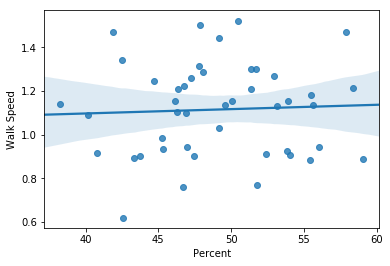

In [69]:
sns.regplot(x='Percent', y='Walk Speed', data=merged)